<a href="https://colab.research.google.com/github/brkent/raspberrypi/blob/main/galaxyclusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Spanning Trees with Galaxy Clusters**


Data from:
*   https://ui.adsabs.harvard.edu/abs/1988AJ.....95..284D/abstract
*   https://ui.adsabs.harvard.edu/abs/1988AJ.....95..985D/abstract
*   https://ui.adsabs.harvard.edu/abs/1991A%26A...246..301R/abstract



In [ ]:
pip install mst_clustering

DRCG 0247-31
DRCG 0003-50
ABELL 1631  
DRCG 0428-53
DRCG 0608-33
DRCG 2048-52
DRCG 0559-40
ABELL 1983  
ABELL 2151  
ABELL 548   
ABELL 754   
ABELL 1644  


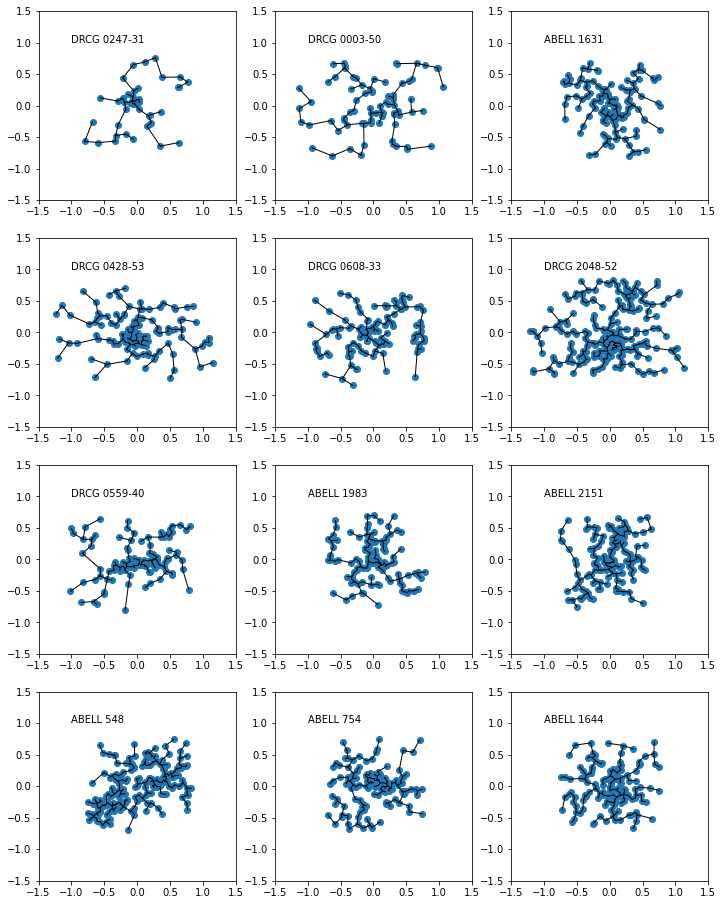

In [4]:
import collections
import csv
import numpy as np
import matplotlib.pyplot as plt
from mst_clustering import MSTClustering

"""
Science and Computing with Raspberry Pi
Brian R. Kent
"""

# get data
# Data from paper Radial velocities in 14 rich clusters (Dressler+ 1988)
# Retrieve on Vizier
filename = 'dressler2.tsv'

fields=['RAJ2000','DEJ2000','Cluster','Gal','Xpos','RA1950','DE1950','MType','mvis','mbulge','ell','cz','n_cz','_RA.icrs','_DE.icrs']

reader = csv.DictReader(open(filename), fields, delimiter='|')

dicts = []

#Skip three header lines
next(reader)
next(reader)
next(reader)
for row in reader:
    dicts.append(row)

# Sort galaxies into cluster groups
clusternames=[]
for row in dicts:
    clusternames.append(row['Cluster'])

clusterset = set(clusternames)
clusternames = list(clusterset)

catalog = collections.defaultdict(list)

for cluster in clusternames:
    for row in dicts:
        if cluster in row['Cluster']: catalog[cluster].append(row)


#Add in vertex elements with XY coordinates at each row
fig = plt.figure(figsize=(12,16), facecolor='white')

count=0
for clusterselect in catalog.keys():

    print(clusterselect)
    xcoords = []
    ycoords = []

    for row in catalog[clusterselect]:
        xcoords.append(float(row['RAJ2000']))
        ycoords.append(float(row['DEJ2000']))

    xcentroid = np.mean(xcoords)
    ycentroid = np.mean(ycoords)

    Y=[]

    for row in catalog[clusterselect]:
        Y.append([float(row['RAJ2000'])-float(xcentroid), 
                  float(row['DEJ2000'])-float(ycentroid)])

    model = MSTClustering(cutoff_scale=2, approximate=False)
    labels = model.fit_predict(Y) 
    X = model.X_fit_
    segments = model.get_graph_segments(full_graph=True)
    ax = plt.subplot(4,3, count+1)
    ax.plot(segments[0],segments[1], '-k', zorder=1, lw=1)
    ax.scatter(X[:, 0], X[:, 1])

    ax.set_xlim(-1.5,1.5)
    ax.set_ylim(-1.5,1.5)
    ax.text(-1, 1, clusterselect)

    count = count + 1

plt.draw()
# plt.savefig('abell2.png')
plt.show()

